In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/VH_Google2E-2/Datasets/Github data ')

In [ ]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep = '\t', header = None)
dev_df = pd.read_csv('dev.tsv', sep = '\t', header = None)
test_df = pd.read_csv('test.tsv', sep = '\t', header = None)

In [ ]:
train_df.columns = ['Query', 'Well-Formed Rank']
dev_df.columns = ['Query', 'Well-Formed Rank']
test_df.columns = ['Query', 'Well-Formed Rank']

train_df

,Query,Well-Formed Rank
0,The European Union includes how many ?,0.2
1,What are Mia Hamms accomplishment ?,0.4
2,Which form of government is still in place in ...,1.0
3,When was the canal de panama built ?,0.8
4,What color is the black box on commercial aero...,0.6
...,...,...
17495,What is the youngest college graduate ?,0.4
17496,Pros and cons of making dams ?,0.0
17497,Life and story of jose ma panganiban ?,0.0
17498,How do you apply for a super delegate position ?,1.0


In [ ]:
# train_df

In [ ]:
# dev_df

In [ ]:
# test_df

In [ ]:
sorted_rank_train = train_df.sort_values(by = 'Well-Formed Rank', ascending = False)
sorted_rank_train

,Query,Well-Formed Rank
43,What is the national anthem in Israel ?,1.0
17499,What is the incubation period for a giant tort...,1.0
17498,How do you apply for a super delegate position ?,1.0
17494,How does a sound wave transmit matter ?,1.0
2,Which form of government is still in place in ...,1.0
...,...,...
3958,The law of reflection in physical ?,0.0
3967,How does the culture of new france shown ?,0.0
3977,The doctrine of nullification was derived from...,0.0
3979,The North America 's population is made of ?,0.0


In [ ]:
sorted_rank_test = test_df.sort_values(by = 'Well-Formed Rank', ascending = False)

sorted_rank_test

,Query,Well-Formed Rank
3844,How much fat can a person consume based on a 2...,1.0
3801,When did confucianism start and end ?,1.0
3805,How much is a 1998 Dale Earnhardt glass worth ?,1.0
3807,What is cymphonique 's fan number ?,1.0
3786,How do you remove the bumper cover from a 1998...,1.0
...,...,...
637,Bangkok IN which river ke kinaray abaad hai ?,0.0
638,The measures that can be taken to minimize the...,0.0
639,Where is savanna location ?,0.0
2761,Replace headlight bulb 2001 VW jetta ?,0.0


In [ ]:
sorted_rank_dev = dev_df.sort_values(by = 'Well-Formed Rank', ascending = False)

sorted_rank_dev

,Query,Well-Formed Rank
6,How can you increase your memory ?,1.0
3748,How many terms is the governor allowed to serve ?,1.0
0,Who discovered x-rays in 1885 ?,1.0
3747,Will a job as an electrician still exist in th...,1.0
4,Are there scene kids in denmark ?,1.0
...,...,...
3677,What is adrian jalaludin from okto real age ?,0.0
3678,Panama what is the weather in march ?,0.0
3680,What si teh globe ?,0.0
35,What is the wolds record for hula hooping ?,0.0


In [ ]:
# check for random characters (contains non-alphanumeric)

def is_alnum_with_spaces(query):
  # rm spaces bc the builtin func will flag
  return query.replace(" ", "").isalnum()

In [ ]:
non_alnum_train = sorted_rank_train['Query'].apply(lambda query: not is_alnum_with_spaces(query)).sum()
non_alnum_test = sorted_rank_test['Query'].apply(lambda query: not is_alnum_with_spaces(query)).sum()
non_alnum_dev = sorted_rank_dev['Query'].apply(lambda query: not is_alnum_with_spaces(query)).sum()


print("check non-alnum in train:", non_alnum_train)
print("check non-alnum in test:", non_alnum_test)
print("check non-alnum in dev:", non_alnum_dev, "\n")

print("total original data in train:", sorted_rank_train.shape[0])
print("total original data in test:", sorted_rank_test.shape[0])
print("total original data in dev:", sorted_rank_dev.shape[0])

# so the data has no random characters!

check non-alnum in train: 17500
check non-alnum in test: 3850
check non-alnum in dev: 3750 

total original data in train: 17500
total original data in test: 3850
total original data in dev: 3750


In [ ]:
digit_start_train = sorted_rank_train[sorted_rank_train['Query'].str.match(r'^\d')]
print("Queries start with number(s) in train:\n", digit_start_train)

Queries start with number(s) in train:
                                              Query  Well-Formed Rank
16764  10g of butter equals how many tablespoons ?               1.0
16318             1000 liters is how many pounds ?               1.0
14084            1 millimeter is how many inches ?               1.0
9145            1.0 L of water is how many grams ?               1.0
11306      1500 milligrams equals how many grams ?               1.0
...                                            ...               ...
11334         1 intersting fact of louis pasteur ?               0.0
1710                       1 tablespoon of flour ?               0.0
4039              2000 VW bug license plate bulb ?               0.0
14902         20 examples of deductive reasoning ?               0.0
11367            2 feet equals to how many feets ?               0.0

[275 rows x 2 columns]


In [ ]:
digit_start_dev = sorted_rank_dev[sorted_rank_dev['Query'].str.match(r'^\d')]
print("Queries start with number(s) in dev:\n", digit_start_dev)

Queries start with number(s) in dev:
                                                   Query  Well-Formed Rank
2625                           1 fl oz is how many ml ?               1.0
1581        5 acres equals how many square kilometers ?               0.8
475                  8 ounces is how many millilitres ?               0.8
1863                      197 kgs equals how many lbs ?               0.8
1881              2 eighth notes equal how many beats ?               0.8
...                                                 ...               ...
1913              500 dollar bill 1934 L series value ?               0.0
24                         97 cavalier 's gas mileage ?               0.0
1878                    40 units equals how man CC 's ?               0.0
3698  1907 Nickel with a lady and thirteen stars on ...               0.0
1916                 98 suzuki king quad oil capacity ?               0.0

[65 rows x 2 columns]


In [ ]:
digit_start_test = sorted_rank_test[sorted_rank_test['Query'].str.match(r'^\d')]
print("Exanples of queries start with number(s) in test:\n", digit_start_test.head(10), '\n')

digit_start_test.shape

Exanples of queries start with number(s) in test:
                                                   Query  Well-Formed Rank
747                 20 newtons equals how many joules ?               0.8
919   1563385 rounded off to the nearst million beco...               0.6
1083              500 euros is how much in us dollars ?               0.6
1894               20 grams of flour is how many cups ?               0.6
2430                         1 cup has how many grams ?               0.6
2613  2 tablespoons of yogurt is equivalent to how m...               0.6
749                 3 What is the state tree for Ohio ?               0.6
897       1 kilogram is equal to how many milliliters ?               0.6
1293                           5 facts on JRR Tolkien ?               0.6
2657                 1 gallon is how many millimeters ?               0.6 



(58, 2)

#Check queries that starts with digit and no space with the next word: 1What, 5How many, etc

- Sensitive case: 10g of butter equal to .., 10km to .., etc

In [ ]:
digit_noSpace_train = sorted_rank_train[sorted_rank_train['Query'].str.match(r'^\d+\S')]
print("Queries start with number(s) in train:\n", digit_noSpace_train)

Queries start with number(s) in train:
                                              Query  Well-Formed Rank
16764  10g of butter equals how many tablespoons ?               1.0
16318             1000 liters is how many pounds ?               1.0
9145            1.0 L of water is how many grams ?               1.0
11306      1500 milligrams equals how many grams ?               1.0
8223       0.68 grams equals how many milligrams ?               0.8
...                                            ...               ...
15064                          1979 Kennedy half ?               0.0
11150             93 nissian altima firing order ?               0.0
11189                16 fl oz in how many ounces ?               0.0
4039              2000 VW bug license plate bulb ?               0.0
14902         20 examples of deductive reasoning ?               0.0

[192 rows x 2 columns]


**Reference:** https://huggingface.co/docs/transformers/v4.44.2/en/model_doc/bert#transformers.TFBertForMaskedLM

In [ ]:
# from transformers import AutoTokenizer, TFBertForMaskedLM
# import tensorflow as tf

# tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
# model = TFBertForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

# inputs = tokenizer("The capital of France is [MASK].", return_tensors="tf")
# logits = model(**inputs).logits

# # retrieve index of [MASK]
# mask_token_index = tf.where((inputs.input_ids == tokenizer.mask_token_id)[0])
# selected_logits = tf.gather_nd(logits[0], indices=mask_token_index)

# predicted_token_id = tf.math.argmax(selected_logits, axis=-1)
# tokenizer.decode(predicted_token_id)

In [ ]:
filtered_sorted_train = train_df[train_df['Well-Formed Rank']>=0.5]
filtered_sorted_train

,Query,Well-Formed Rank
2,Which form of government is still in place in ...,1.0
3,When was the canal de panama built ?,0.8
4,What color is the black box on commercial aero...,0.6
6,How did samoans come into samoa ?,0.8
9,What is the value of military payment certific...,0.8
...,...,...
17491,What are some consequences of cyber bullying ?,1.0
17492,What are the 4 major climate types of northern...,1.0
17494,How does a sound wave transmit matter ?,1.0
17498,How do you apply for a super delegate position ?,1.0


In [ ]:
filtered_sorted_test = test_df[test_df['Well-Formed Rank']>=0.5]
filtered_sorted_test

,Query,Well-Formed Rank
2,What places have the oligarchy government ?,1.0
5,Where is atp synthesized and stored ?,1.0
11,How much fat is in turkey ?,1.0
16,What is the ticker symbol for Consolidated Edi...,0.8
17,The small intestine is divided into what parts ?,1.0
...,...,...
3844,How much fat can a person consume based on a 2...,1.0
3846,How do you determine if a problem is a Hardwar...,0.8
3847,What are Bar Mitzvah and Bat Mitzv ?,0.8
3848,How much does an adult movie ticket cost at th...,0.6


In [ ]:
filtered_sorted_dev = dev_df[dev_df['Well-Formed Rank']>=0.5]
filtered_sorted_dev

,Query,Well-Formed Rank
0,Who discovered x-rays in 1885 ?,1.0
4,Are there scene kids in denmark ?,1.0
5,Where did cocoa come from ?,0.8
6,How can you increase your memory ?,1.0
8,Are civil responsibilities in the constitution ?,0.8
...,...,...
3740,When was the NHS created ?,1.0
3741,Where was Marquis de Lfayette born ?,0.8
3746,How did Geography help the success of the amer...,1.0
3747,Will a job as an electrician still exist in th...,1.0


#New Ver: distilroberta

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade transformers huggingface_hub tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompa

In [ ]:
training_data = filtered_sorted_train['Query'].str.rstrip('?')
testing_data = filtered_sorted_test['Query'].str.rstrip('?')
validation_data = filtered_sorted_dev['Query'].str.rstrip('?')

#V2

In [ ]:
training_data = filtered_sorted_train[['Query']]
testing_data = filtered_sorted_test[['Query']]
validation_data = filtered_sorted_dev[['Query']]

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

train_dt = Dataset.from_pandas(training_data)
test_dt = Dataset.from_pandas(testing_data)
val_dt = Dataset.from_pandas(validation_data)

dataset = DatasetDict({'train':train_dt, 'test':test_dt, 'validation':val_dt})

# print(dataset['train'][:5])
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Query', '__index_level_0__'],
        num_rows: 8836
    })
    test: Dataset({
        features: ['Query', '__index_level_0__'],
        num_rows: 1910
    })
    validation: Dataset({
        features: ['Query', '__index_level_0__'],
        num_rows: 1898
    })
})


In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'distilroberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
  return tokenizer(examples['Query'], truncation = True, padding = 'max_length', max_length = 512, return_special_tokens_mask = True)

tokenized_datasets = dataset.map(tokenize_function, batched = True, num_proc = 4, remove_columns = ['Query'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map (num_proc=4):   0%|          | 0/8836 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1910 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1898 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets['train'][0])

{'__index_level_0__': 2, 'input_ids': [0, 32251, 1026, 9, 168, 16, 202, 11, 317, 11, 821, 5314, 1755, 17487, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
decoded_query = tokenizer.decode(tokenized_datasets['train'][0]['input_ids'], skip_special_tokens=True)
print(f"Decoded Query: {decoded_query}")

Decoded Query: Which form of government is still in place in greece?


# Data Collator

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm = True, mlm_probability = 0.15, return_tensors = 'tf')

# Load Pre-Trained

In [ ]:
from transformers import TFAutoModelForMaskedLM

model = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForMaskedLM.

All the weights of TFRobertaForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.


# TF data

In [ ]:
train_tf_data = model.prepare_tf_dataset(
    tokenized_datasets['train'],
    shuffle = True,
    batch_size = 16, #may change.. see how it runs
    collate_fn = data_collator,
)

validation_tf_data = model.prepare_tf_dataset(
    tokenized_datasets['validation'],
    shuffle = False, #
    batch_size = 16,
    collate_fn = data_collator,
)

In [ ]:
from transformers import AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate = 0.01) #for regularization lt
model.compile(optimizer = optimizer, jit_compile = False) #changed here


In [ ]:
# from transformers.keras_callbacks import PushToHubCallback
# from tensorflow.keras.callbacks import TensorBoard

# model_name = model_checkpoint.split('/')[-1]
# push_to_hub_model_id = f"{model_name}-classicBM-finetuned-Query"

# tensorboard_callback = TensorBoard(log_dir="/content/drive/MyDrive/VH_Google2E-2/clm_model_save/logs") # to be changed path name   #fixed the extra ./clm (bruh)

# push_to_hub_callback = PushToHubCallback(
#     output_dir="/content/drive/MyDrive/VH_Google2E-2/clm_model_save",     #to be changed path name     #same:
#     tokenizer=tokenizer,
#     hub_model_id=push_to_hub_model_id,
# )

# # callbacks = [tensorboard_callback, push_to_hub_callback]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/drive/MyDrive/VH_Google2E-2/clm_model_save is already a clone of https://huggingface.co/tvhessa/distilroberta-base-classicBM-finetuned-Query. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
# callback = PushToHubCallback(
#     output_dir="/content/drive/MyDrive/VH_Google2E-2/clm_model_save",
#     tokenizer=tokenizer,
#     hub_model_id=push_to_hub_model_id,
#     use_auth_token=True,
# )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/drive/MyDrive/VH_Google2E-2/clm_model_save is already a clone of https://huggingface.co/tvhessa/distilroberta-base-classicBM-finetuned-Query. Make sure you pull the latest changes with `repo.git_pull()`.


#Run about 5-10mins

In [ ]:
model.fit(
    train_tf_data,
    validation_data=validation_tf_data,
    epochs=2,
    # callbacks=callbacks
)


Epoch 1/2
552/552 [==============================] - 938s 2s/step - loss: 2.7594 - val_loss: 2.4276
Epoch 2/2
552/552 [==============================] - 939s 2s/step - loss: 2.4782 - val_loss: 2.3390


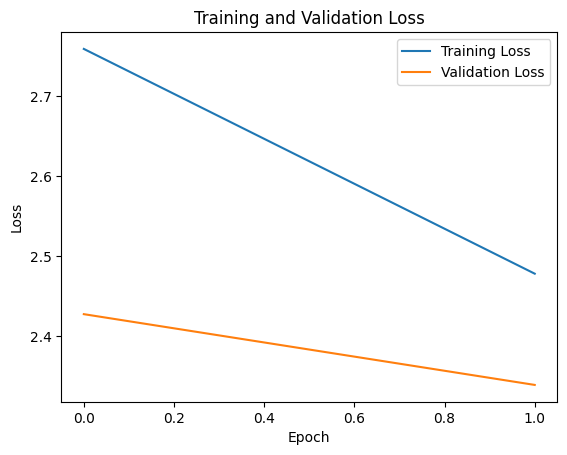

In [ ]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
save_dir = "/content/drive/MyDrive/VH_Google2E-2/mlm_model_save"
model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)

('/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/tokenizer_config.json',
 '/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/special_tokens_map.json',
 '/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/vocab.json',
 '/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/merges.txt',
 '/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/added_tokens.json',
 '/content/drive/MyDrive/VH_Google2E-2/mlm_model_save/tokenizer.json')

In [ ]:
from transformers import pipeline

mask_filler = pipeline('fill-mask', model = save_dir, tokenizer = tokenizer, framework = 'tf')

All model checkpoint layers were used when initializing TFRobertaForMaskedLM.

All the layers of TFRobertaForMaskedLM were initialized from the model checkpoint at /content/drive/MyDrive/VH_Google2E-2/mlm_model_save.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForMaskedLM for predictions without further training.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


# Sample Training works

In [ ]:
test_queries = [
    '20 newtons equals how many <mask> ?', #joules
    'What is the <mask> anthem in Israel ?', #national
    'Lewis <mask> for CO2 ?', #sructure (structure: the dataset spelled wrong)
    '1500 milligrams equals how many <mask> ?', #gram
]


for query in test_queries:
  results = mask_filler(query, top_k = 3)
  print(f"Input: {query}")
  for res in results:
    print(f"Output Prediction: {res['token_str']} | Score = {res['score']:.4f}") #can try: sequence
  print('\n')

Input: 20 newtons equals how many <mask> ?
Output Prediction:  pounds | Score = 0.0605
Output Prediction:  grams | Score = 0.0584
Output Prediction:  tons | Score = 0.0426


Input: What is the <mask> anthem in Israel ?
Output Prediction:  national | Score = 0.9624
Output Prediction:  official | Score = 0.0125
Output Prediction:  main | Score = 0.0048


Input: Lewis <mask> for CO2 ?
Output Prediction:  test | Score = 0.0336
Output Prediction:  is | Score = 0.0323
Output Prediction:  responsible | Score = 0.0240


Input: 1500 milligrams equals how many <mask> ?
Output Prediction:  tons | Score = 0.1164
Output Prediction:  watts | Score = 0.0610
Output Prediction:  grams | Score = 0.0512


